# `Matplotlib annotations`

In [611]:
import pandas as pd
import duckdb 

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [613]:
df["Total foreign born"].iloc[0]

'7,127'

In [614]:
columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]


df_nordic = df[columns]
df_nordic.head()

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,NaN,5,"2,991"
4,32,4,3,5,"3,301"


In [615]:
df_nordic = df_nordic.fillna("0")

In [616]:
for column in columns:
    df[column] = df_nordic[column].str.replace(",", "").astype(int)

In [617]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sweden              161 non-null    int64
 1   Norway              161 non-null    int64
 2   Finland             161 non-null    int64
 3   Denmark             161 non-null    int64
 4   Total foreign born  161 non-null    int64
dtypes: int64(5)
memory usage: 6.4 KB


In [618]:
df_nordic = duckdb.query(
    """--sql
    WITH nordic AS (
        FROM df
            SELECT
                state,
                SUM("Total foreign born") AS "Total Foreigners",
                SUM(sweden) AS Swedes,
                SUM(norway) AS Norwegians,
                SUM(denmark) AS Danish,
                SUM(finland) AS Finnish
            GROUP BY
                state
    )
    FROM nordic n
    SELECT *, n.swedes + n.norwegians + n.danish + n.finnish AS Nordic
    ORDER BY
        nordic 
    DESC
    """
).df()

df_nordic.head()

,State,Total Foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0


## TODO 
- more visualization on Nordic
- more visualization on Total foreigners
- ex bar charts for different states
- compare nordic to total foreigners

In [619]:
df_nordic_visual = df[["State", "Total foreign born", "Sweden", "Norway", "Finland", "Denmark"]]

df_nordic_visual["Total nordic"] = df[["Sweden", "Norway", "Finland", "Denmark"]].sum(axis=1)

df_nordic_visual = df_nordic_visual[["State", "Total foreign born", "Total nordic"]]
df_nordic_visual = df_nordic_visual.groupby("State")[["Total foreign born", "Total nordic"]].sum()
df_nordic_visual = df_nordic_visual.sort_values(by= "Total nordic", ascending=False)
df_nordic_visual = df_nordic_visual.head()


C:\Users\Marcus\AppData\Local\Temp\ipykernel_9160\286863791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nordic_visual["Total nordic"] = df[["Sweden", "Norway", "Finland", "Denmark"]].sum(axis=1)


In [620]:
df_nordic_procent = df_nordic_visual
df_nordic_procent["procent_nordic"] = (df_nordic_visual["Total nordic"] / df_nordic_visual["Total foreign born"] * 100).round(2)
df_nordic_procent = df_nordic_procent.sort_values(by= "procent_nordic", ascending=False)
df_nordic_procent

,Total foreign born,Total nordic,procent_nordic
State,,,
Minnesota,128823,56147,43.58
Illinois,627465,90279,14.39
Wisconsin,124230,14948,12.03
Massachusetts,567170,28942,5.10
New York,1521931,51663,3.39


In [621]:
df_nordic_procent = df_nordic_procent.drop(["Total foreign born", "Total nordic"],axis=1)


In [622]:
df_nordic_procent

,procent_nordic
State,
Minnesota,43.58
Illinois,14.39
Wisconsin,12.03
Massachusetts,5.10
New York,3.39


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Percentage of nordics out of total immigrantion for each state'}, xlabel='State', ylabel='Percentage'>)

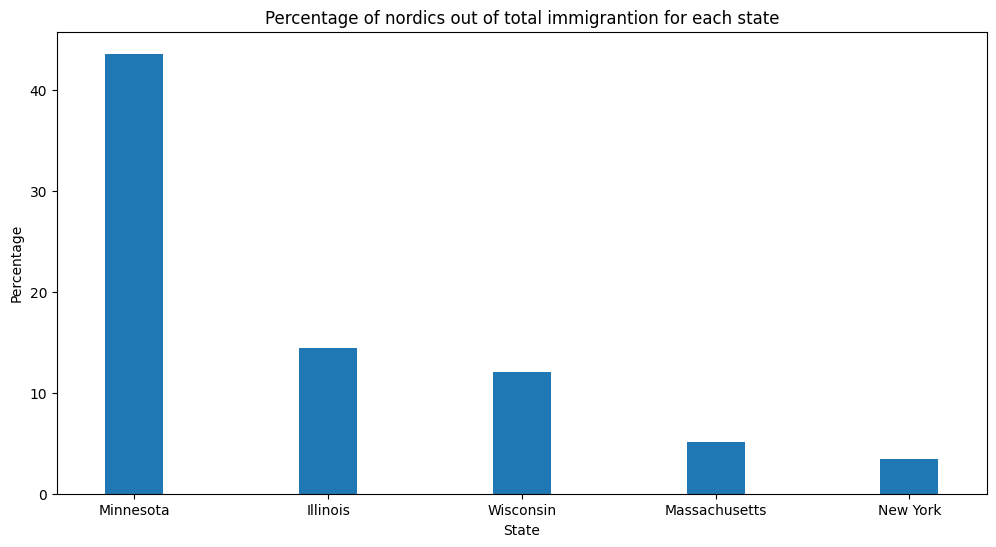

In [623]:
import matplotlib.pylab as plt

def nordic_procent():
    ax = df_nordic_procent.plot(kind= "bar", figsize= (12,6), width= 0.3)
    ax.set_xticklabels(df_nordic_procent.index, rotation= 0)
    
    fig = ax.get_figure()
    ax.set(title= "Percentage of nordics out of total immigrantion for each state", ylabel= "Percentage")
    ax.legend().remove()
    
    
    
    return fig, ax

nordic_procent()

Text(1, 20, '14.39%')

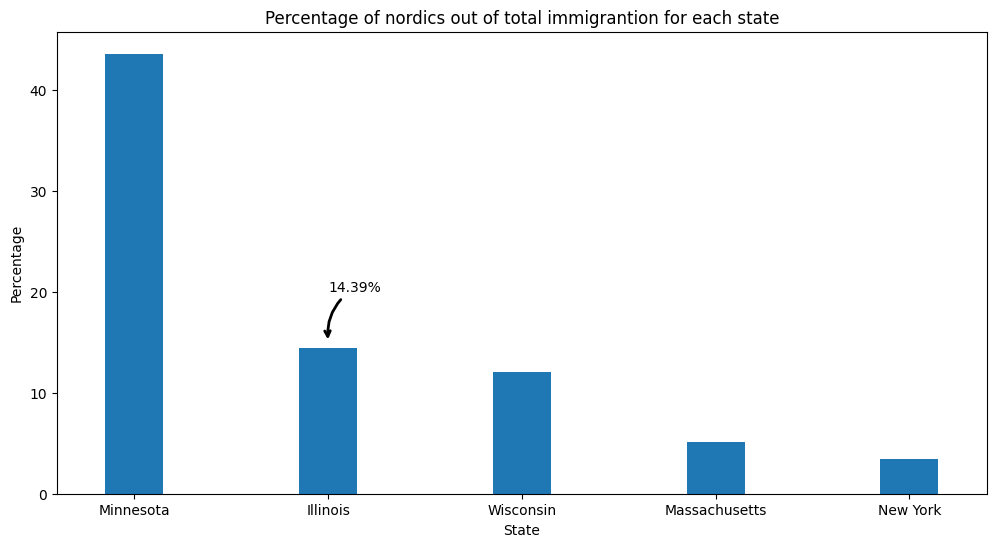

In [624]:
fig, ax = nordic_procent()

arrowprops = dict(arrowstyle = "->", linewidth= 2, connectionstyle= "arc3, rad= .3")
ax.annotate(text= "14.39%", xy= (1, 15), arrowprops= arrowprops, xytext= (1, 20))

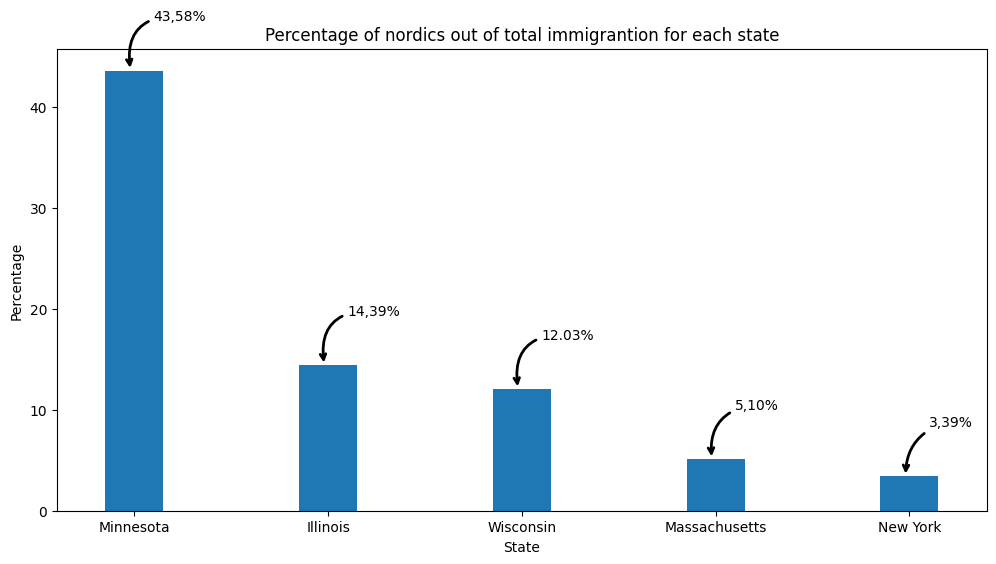

In [625]:
fig, ax = nordic_procent()

# minnesota_bars, illinios_bars, wisconsin_bars, massachusetts_bars, new_york_bars = ax.containers

bars = ax.containers[0] # Behöver bara en för det finns bara en seria i containers den konchen så var det flera seria i en containers.

def percentage_annotate(bar_artist, text, x_offset, y_offset, rad=None):

    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    arrowprops = dict(arrowstyle = "->", linewidth= 2, connectionstyle= f"arc3, rad= {rad}")
    ax.annotate(text= text, 
                xy= (xy[0] + .13, xy[1]), # bestämer hur långt  texten ska var från stapeln xy[0] är x-världen xy[1] är y-världen där stapeln slutar.
                arrowprops= arrowprops, 
                xytext= (xy[0] + x_offset, xy[1] + y_offset)) # Hur pilen ska vara från stapeln, tillexempel hade man  xy[0] + 0.25 så kommer pilen flyttas 0.25 från centrum av stapeln.
    
    
percentage_annotate(bars[0], "43,58%", 0.25, 5, .6)
percentage_annotate(bars[1], "14,39%", 0.25, 5, .6)
percentage_annotate(bars[2], "12.03%", 0.25, 5, .6)
percentage_annotate(bars[3], "5,10%", 0.25, 5, .5)
percentage_annotate(bars[4], "3,39%", 0.25, 5, .4)


In [626]:
df_nordic_procent.shape

(5, 1)

In [627]:
df_10_top_percentage = df_nordic.sort_values(by= "Nordic", ascending=False).head()
df_10_top_percentage

,State,Total Foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0


In [628]:
# funtion med parameter df som är dataFrame som man vill använda, group_column: har skapat en lista med kolumn namn från dataframe, total_column: Kolumnen med den totala värdet för varje delstat.
def percent_nordic(df, group_columns, total_column):  
    for group in group_columns:               
        percent_col = f"{group}%"
        df[percent_col] = (df[group] / df[total_column] * 100).round(3)        # andel/den total delen (Total foreigners), för att få fram procent
    return df 


nordics_group = ["Swedes", "Norwegians", "Finnish", "Danish"]

df_10_top_percentage = percent_nordic(df_10_top_percentage, nordics_group, "Total Foreigners")
df_10_top_percentage = df_10_top_percentage.drop(columns=["Swedes", "Norwegians", "Finnish", "Danish", "Nordic"])
df_10_top_percentage


,State,Total Foreigners,Swedes%,Norwegians%,Finnish%,Danish%
0,Illinois,627465.0,9.109,3.554,0.071,1.653
1,Minnesota,128823.0,27.157,13.264,0.855,2.309
2,New York,1521931.0,1.969,0.772,0.247,0.406
3,Massachusetts,567170.0,3.874,0.417,0.556,0.256
4,Wisconsin,124230.0,3.247,5.220,0.326,3.239


In [629]:
df_10_top_percentage = df_10_top_percentage.drop(columns=["Total Foreigners"])

In [634]:
df_10_top_percentage = df_10_top_percentage.set_index("State").iloc[:5]

(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

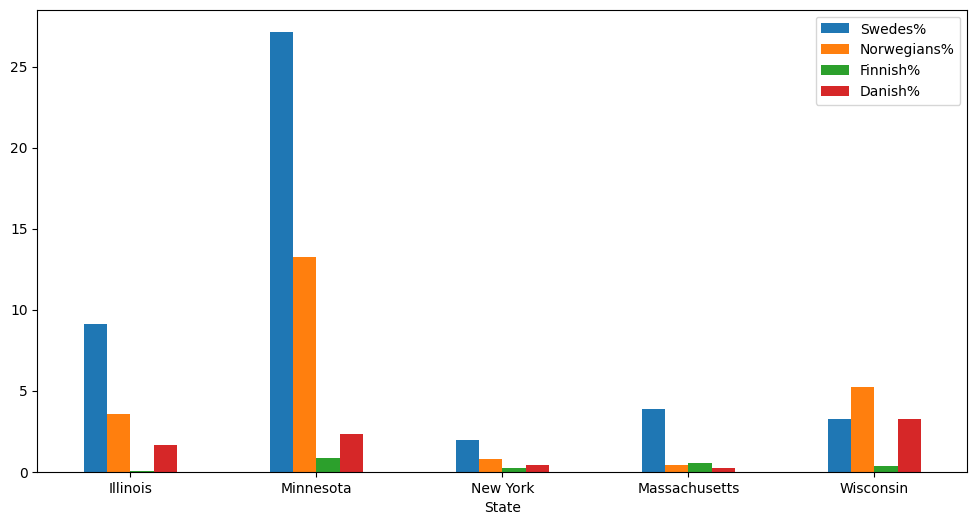

In [635]:

def percentage():
    ax = df_10_top_percentage.plot(kind= "bar", figsize=(12,6))
    ax.set_xticklabels(df_10_top_percentage.index, rotation= 0)
    
    fig = ax.get_figure()
    
    return fig, ax

percentage()

<BarContainer object of 5 artists>

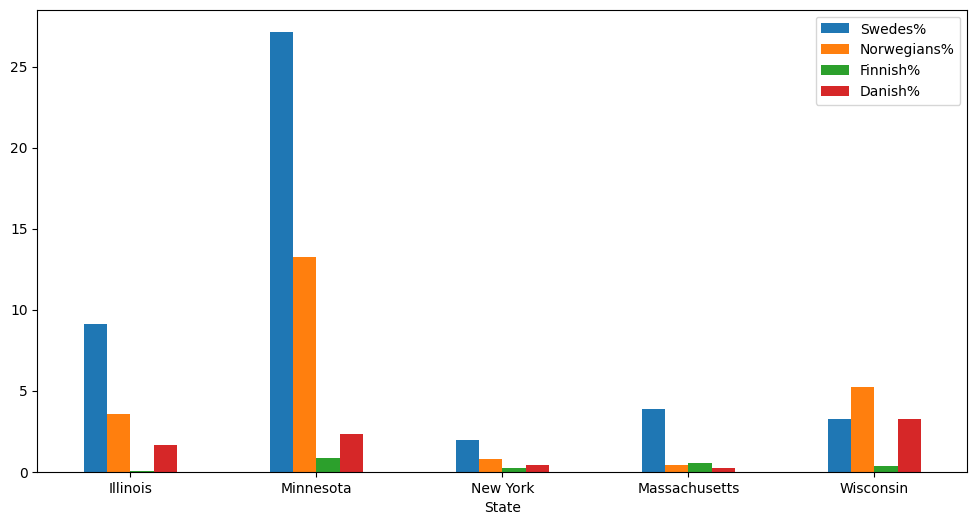

In [669]:
figg, ax = percentage()
ax.containers[0][0].get_x(), ax.containers[0][2].get_height()
ax.containers[1]


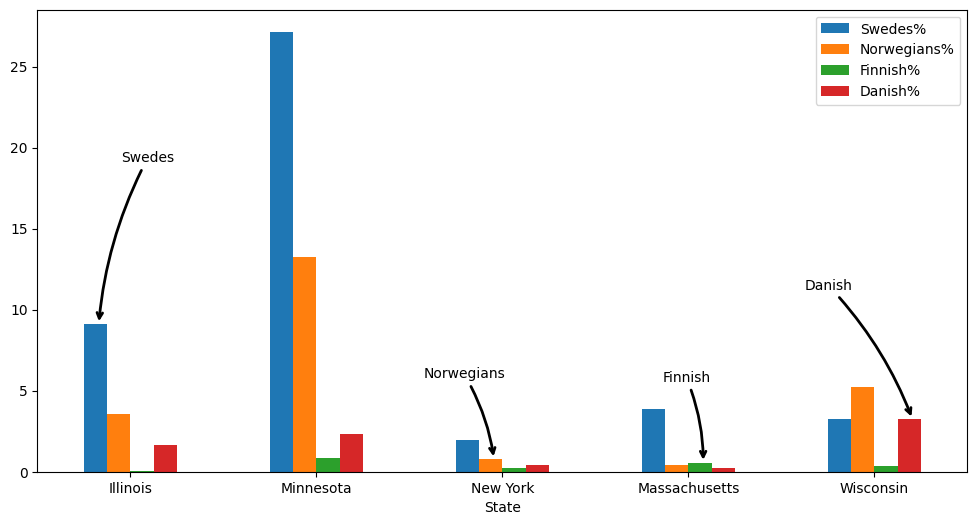

In [711]:
fig,ax = percentage()


swede_bars, norwegian_bars, finnish_bars, danish_bars = ax.containers

def annotate_percentage(bar_artist, text, x_offset, y_offset, rad=None):

    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    arrowprops = dict(arrowstyle= "->", linewidth= 2, connectionstyle= f"arc3, rad={rad}")
    ax.annotate(text= text, 
                xy= (xy[0] + 0.08, xy[1]), 
                arrowprops=arrowprops, 
                xytext= (xy[0] + x_offset, xy[1] + y_offset))
    
annotate_percentage(swede_bars[0], "Swedes", 0.2, 10, 0.1)
annotate_percentage(norwegian_bars[2], "Norwegians", -0.3, 5, -0.1)    
annotate_percentage(finnish_bars[3], "Finnish", -0.14, 5, -0.1)    
annotate_percentage(danish_bars[4], "Danish", -0.5, 8, -0.1)    
    



In [ ]:
fig,ax = percentage()


arrowprops = dict(arrowstyle= "->", linewidth= 2, connectionstyle= "arc3, rad=.6")
ax.annotate(text= "Swedes", xy= (-.18, 9.5), arrowprops=arrowprops, xytext= (-.1,13))


In [ ]:
df_nordic.shape

(39, 7)

In [ ]:
import matplotlib.pyplot as plt

top_3_nordic = df_nordic.drop(["Total Foreigners", "Nordic"], axis=1).set_index("State").iloc[:3]

(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

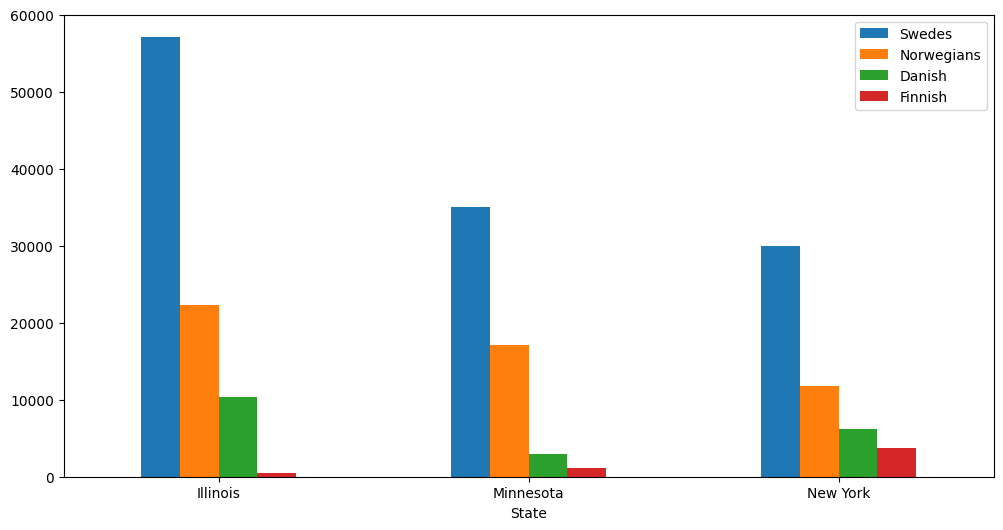

In [ ]:
def nordic_plot():
    ax = top_3_nordic.plot(kind="bar", figsize= (12,6))
    ax.set_xticklabels(top_3_nordic.index, rotation=0)
    
    
    fig = ax.get_figure()
    
    return fig, ax

nordic_plot()

[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

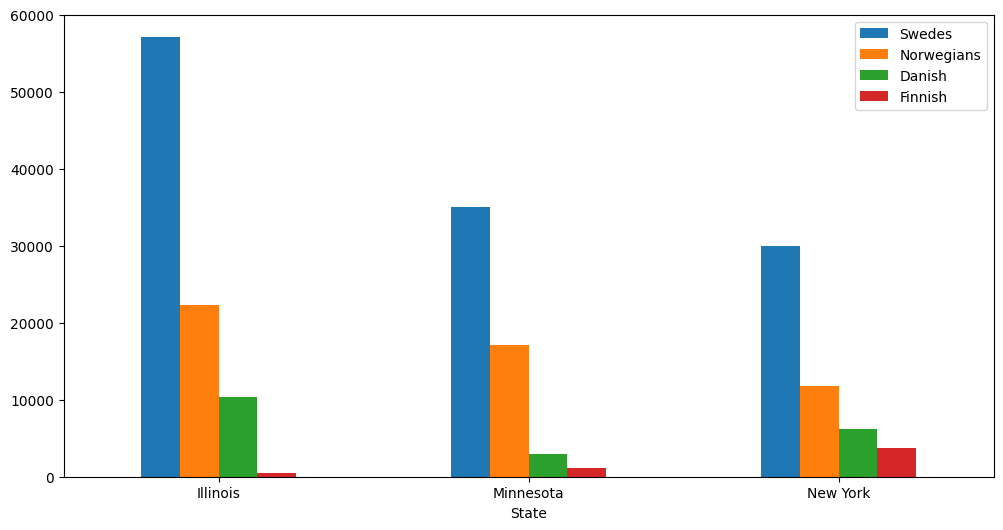

In [ ]:
fig, ax = nordic_plot()

ax.containers

In [ ]:
ax.containers[0][1].get_height(), ax.containers[0][1].get_x()

(np.float64(34984.0), np.float64(0.75))

## Annotate

Text(0.8, 42000, 'Swedes')

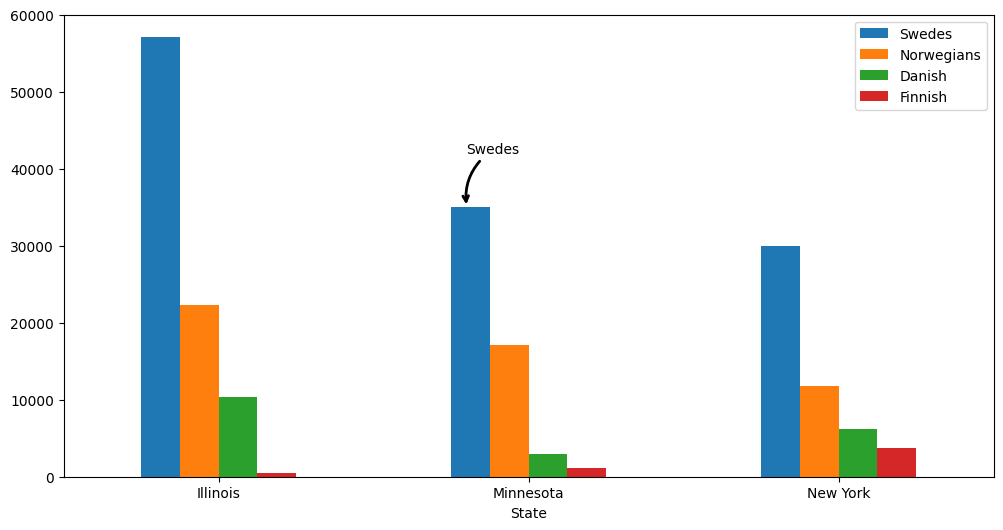

In [ ]:
fig, ax = nordic_plot()

arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle="arc3, rad=.3")
ax.annotate(text="Swedes", xy=(0.8, 35000), arrowprops=arrowprops, xytext=(0.8, 42000))

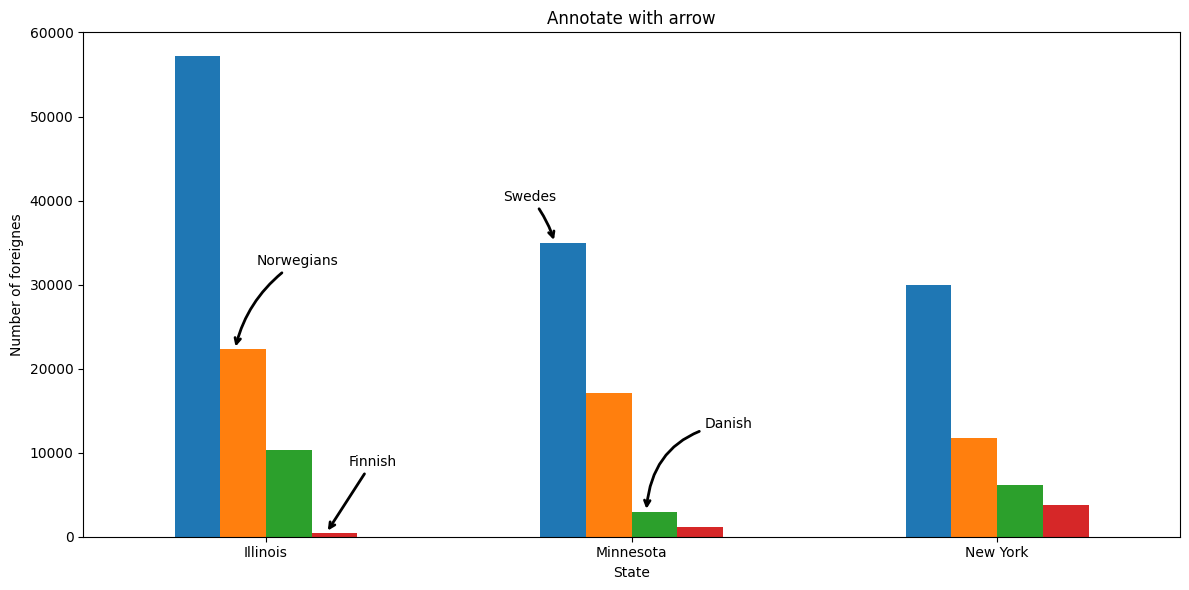

In [ ]:
fig, ax = nordic_plot()

# tuple unpacking of ax.containers that is a list of four BarContainers, which contains 3 Artists each
swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers

def annotate_nordic(bar_artist, text, x_offset, y_offset, rad=None):
    
    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    # ternary if statement 
    # rad = 0.3 if xy[0] < 0 else -0.3
    
    arrowprops = dict(arrowstyle= "->", linewidth= 2, connectionstyle= f"arc3, rad={rad}")
    ax.annotate(
        text = text,
        xy = (xy[0] + 0.04, xy[1]),
        arrowprops= arrowprops, 
        xytext=(xy[0] + x_offset, xy[1] + y_offset))
    
    

annotate_nordic(swede_bars[1], "Swedes", -0.1, 5000, rad= -0.1)
annotate_nordic(norwegian_bars[0], "Norwegians", 0.1, 10000, rad= 0.2)
annotate_nordic(danish_bars[1], "Danish", 0.2, 10000, rad= .4)
annotate_nordic(finnish_bars[0], "Finnish", 0.1, 8000, rad= 0)

ax.set(title="Annotate with arrow", ylabel= "Number of foreignes")
ax.legend().remove()
fig.tight_layout()
fig.savefig("figures/annotate.png")


# Todo
# draw other annotations
# remove legend
# save the figure